## MDS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dist_matrix = pairwise_distances(X_scaled, metric='euclidean')

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
X_mds = mds.fit_transform(dist_matrix)

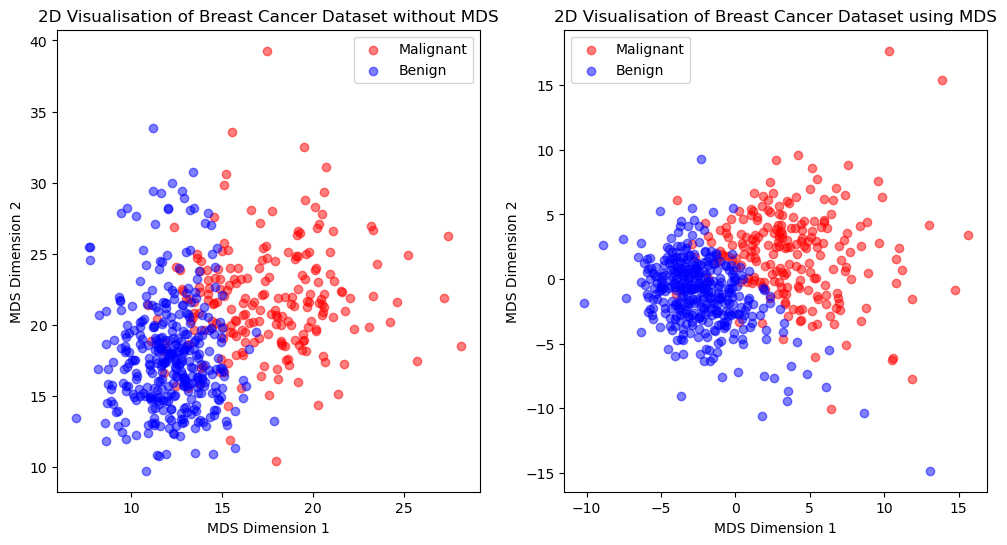

In [4]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', alpha=0.5, label='Malignant')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', alpha=0.5, label='Benign')
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.title("2D Visualisation of Breast Cancer Dataset without MDS")
plt.legend(labels=["Malignant", "Benign"])

plt.subplot(1, 2, 2)
plt.scatter(X_mds[y == 0, 0], X_mds[y == 0, 1], color='red', alpha=0.5, label='Malignant')
plt.scatter(X_mds[y == 1, 0], X_mds[y == 1, 1], color='blue', alpha=0.5, label='Benign')
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.title("2D Visualisation of Breast Cancer Dataset using MDS")
plt.legend(labels=["Malignant", "Benign"])
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0)

### Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## PCA (Principal Component Analysis)

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 1)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## t-SNE (t-Distributed Stochastic Neighbor)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0)

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.manifold import TSNE

In [11]:
tsne = TSNE(n_components = 2, random_state = 0)

In [12]:
tsne_obj = tsne.fit_transform(X_train)

c:\Users\Neil\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Neil\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Neil\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Neil\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Neil\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(

In [13]:
import pandas as pd
tsne_df = pd.DataFrame({'X' : tsne_obj[:,0],
                       'Y' : tsne_obj[:,1],
                        'classification' : y_train
                       })

In [14]:
tsne_df.head()

,X,Y,classification
0,-7.053003,-2.806510,1
1,-8.142869,-9.293004,1
2,-13.934480,8.887429,1
3,-2.931662,-9.876837,1
4,-9.162365,-12.554125,1


In [15]:
tsne_df['classification'].value_counts()

classification
1    290
0    165
Name: count, dtype: int64

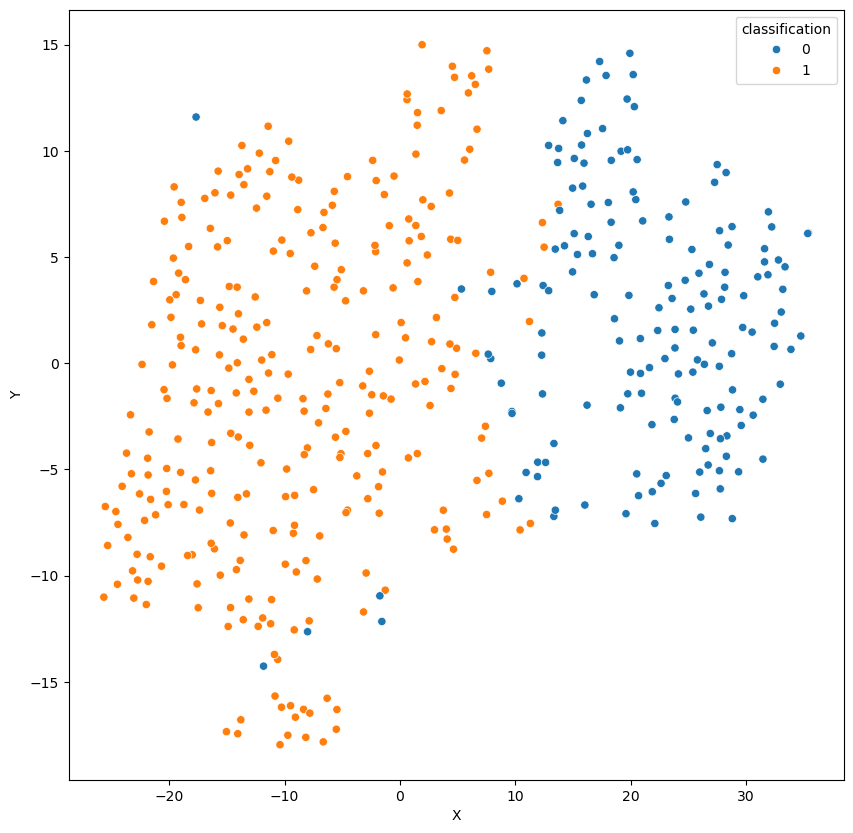

In [16]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'X', y = 'Y', data = tsne_df, hue=tsne_df['classification'])
plt.show()

We have obtained the plot of the data points but are unable to segregate. Let's introduce hue

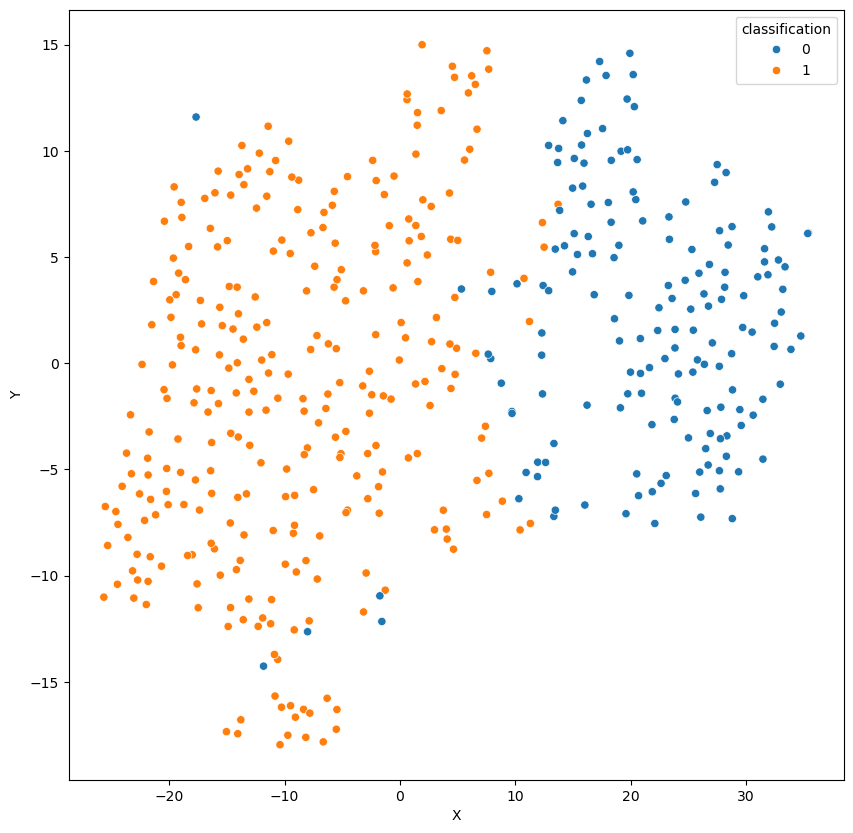

In [17]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = "X", y = 'Y', hue = 'classification', legend = 'full', data = tsne_df)
plt.show()

## LDA (Linear Discriminant Analysis)

### Performing LDA (Linear Discriminant Analysis)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

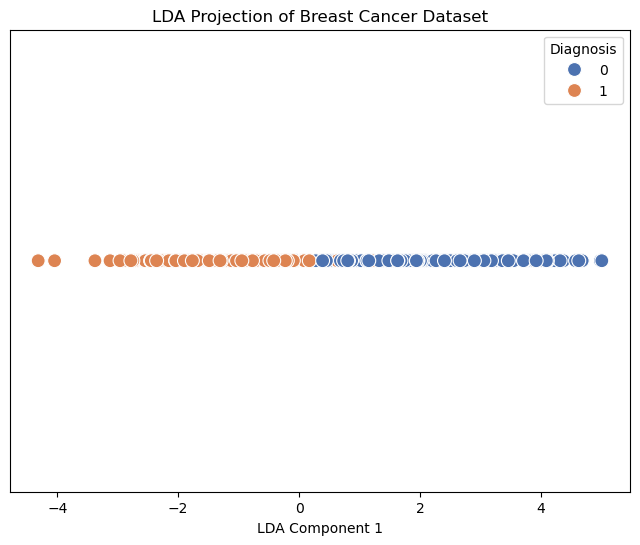

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for plotting
import pandas as pd
df_lda = pd.DataFrame({'LDA1': X_train[:, 0], 'Diagnosis': y_train})

# Plot using Seaborn
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_lda['LDA1'], y=[0] * len(df_lda), hue=df_lda['Diagnosis'], palette="deep", s=100)
plt.xlabel('LDA Component 1')
plt.title('LDA Projection of Breast Cancer Dataset')
plt.yticks([])  # Remove y-axis labels since it's 1D
plt.legend(title='Diagnosis')
plt.show()
